### Training Loss

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
losses_2  = pd.read_csv('latent_size_2/losses.csv')
losses_4  = pd.read_csv('latent_size_4/losses.csv')
losses_8  = pd.read_csv('latent_size_8/losses.csv')
losses_12 = pd.read_csv('latent_size_12/losses.csv')
losses_16 = pd.read_csv('latent_size_16/losses.csv')

train_losses = pd.DataFrame({
    2:  losses_2['train_losses'],
    4:  losses_4['train_losses'],
    8:  losses_8['train_losses'],
    12: losses_12['train_losses'],
    16: losses_16['train_losses'],
})

test_losses = pd.DataFrame({
    2:  losses_2['test_losses'],
    4:  losses_4['test_losses'],
    8:  losses_8['test_losses'],
    12: losses_12['test_losses'],
    16: losses_16['test_losses'],
})

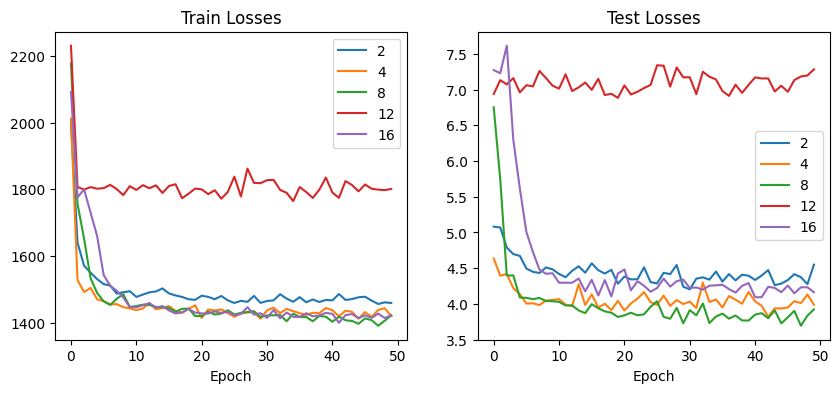

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

train_losses.plot(ax=axs[0])
test_losses.plot(ax=axs[1])

axs[0].set_title('Train Losses')
axs[1].set_title('Test Losses')

axs[0].set_xlabel('Epoch')
axs[1].set_xlabel('Epoch')

plt.show()

### Reconstruction

In [4]:
from wearsed.dataset.WearSEDDataset import WearSEDDataset
from wearsed.models.vae.VAE import VAE
import torch

In [5]:
SIGNAL = 'Pleth'
FREQ = 256

dataset = WearSEDDataset(mesaid_path='../../../dataset/data_ids/', signals_to_read=[SIGNAL])

# Data point
r1 = dataset[1]
signal = r1.psg[SIGNAL]

# 10 seconds of signal
batch = []
start = len(signal) // 3
for i in range(20):
    batch.append(torch.Tensor(signal[start+i*FREQ:start+i*FREQ+FREQ].values))
batch = torch.stack(batch)

In [9]:
def reconstruct(batch, latent_dim):
    model = VAE(input_dim=FREQ, latent_dim=latent_dim)
    model.load_state_dict(torch.load(f'latent_size_{latent_dim}/model_final.pth', weights_only=True, map_location=torch.device('cpu')))
    model.eval()

    recon, _, _ = model(batch)
    del model

    return recon.view(-1).detach().numpy()

In [10]:
comp = pd.DataFrame({'original': batch.view(-1).detach().numpy()})
for ls in [2, 4, 8, 12, 16]:
    recon = reconstruct(batch, ls)
    comp[f'ls={ls}'] = recon

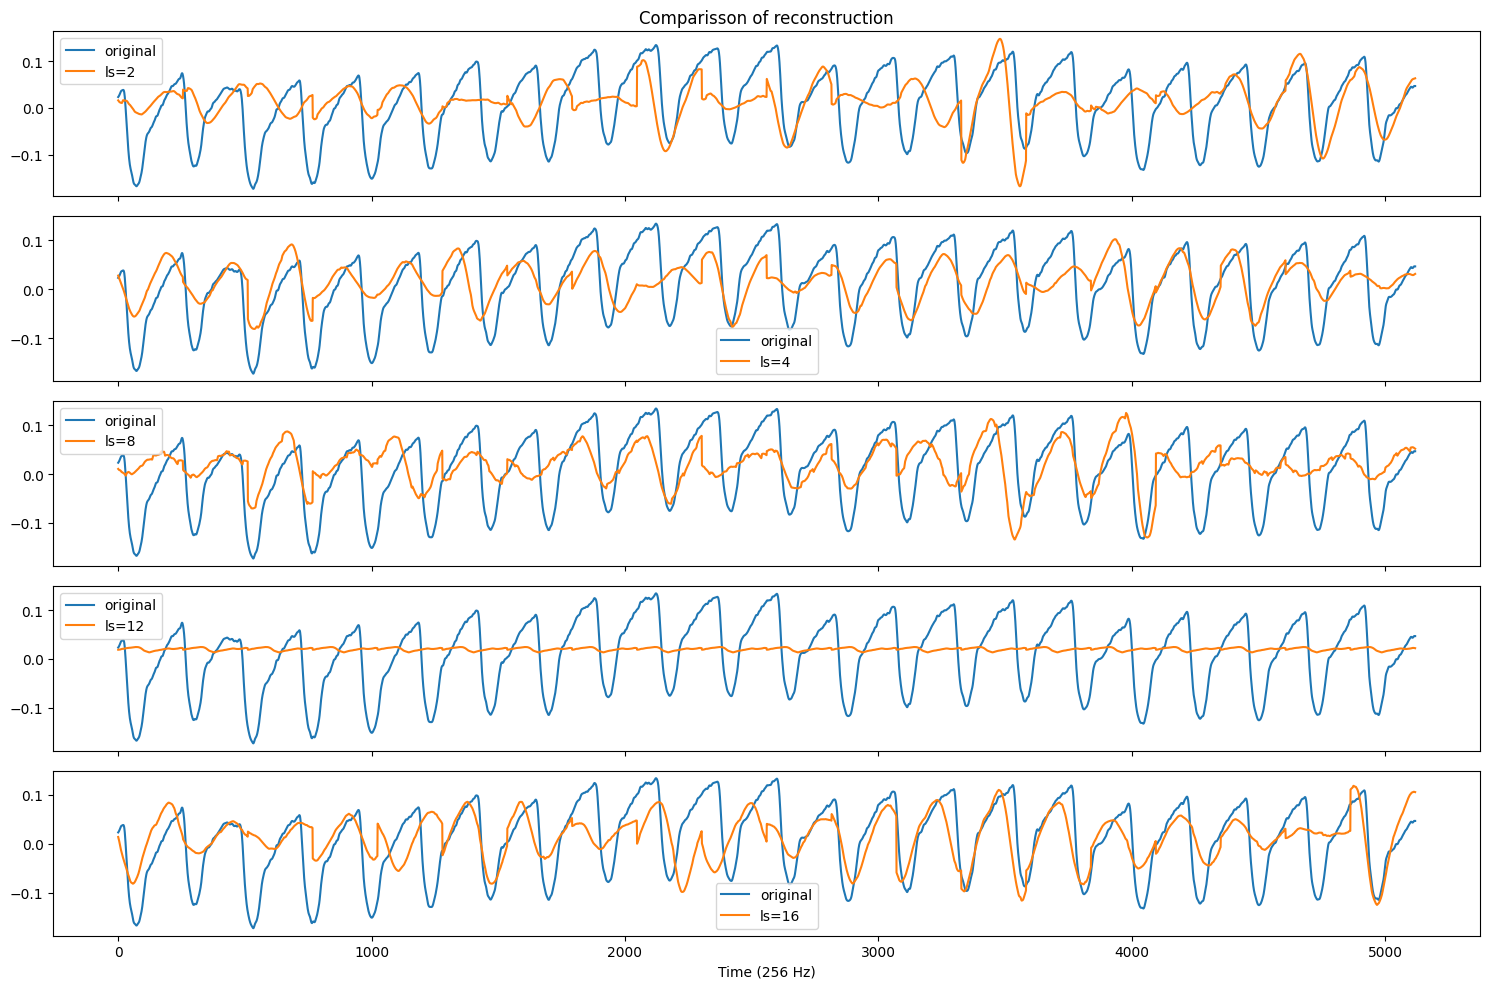

In [11]:
fig, axs = plt.subplots(5, 1, figsize=(15, 5*2), sharex=True)
for i, ls in enumerate([2, 4, 8, 12, 16]):
    comp[['original', f'ls={ls}']].plot(ax=axs[i])
axs[0].set_title('Comparisson of reconstruction')
axs[4].set_xlabel(f'Time ({FREQ} Hz)')
plt.tight_layout()
plt.show()